# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# 1.1 The total number of records
assert data.size!=data.shape[0] # size是所有元素的个数，行数*列数，shape是行数和列数的元组
调查人数 = data.shape[0]
调查人数

45222

In [3]:
# 1.2 The number of individuals making more than $50000 annually
# 1.3 The number of individuals making at most $50000 annually
# 可以通过value_counts()函数查看每个类别的个数
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [4]:
# 也可以这样解
高收入人数 = data[data['income']=='>50K'].shape[0]
低收入人数 = data[data['income']=='<=50K'].shape[0]
高收入人数, 低收入人数

(11208, 34014)

In [5]:
# 1.4 The percentage of individuals making at more than $50000 annually
# 首先要检查收入的数据有没有缺失值，不然调查人数不是所有人
data['income'].isnull().sum()


0

In [6]:
高收入人数占比 = 高收入人数/调查人数
高收入人数占比

0.2478439697492371

### Exercise 2 Preprocessing 

In [7]:
# 2.1 Visualize skewed continuous features of original data
# skewed continuous features 是哪些呢？
# 第一步，continuous的列有哪些？判断的方法是连续型随机变量unique的值一般很多，因为是实数，取到每一个具体值的概率都是0
# 所以可以用 nunique()函数来判断。如果unique的值很少，那么就是离散型随机变量。
连续型随机变量 = [col for col in data.columns if data[col].dtype!='object' and data[col].nunique()>10]
连续型随机变量
# 第二步，skewed的列有哪些？判断的方法是，如果数据分布不对称，那么就是skewed的。
偏的连续型随机变量 = [col for col in 连续型随机变量 if data[col].skew()>1]
偏的连续型随机变量

['capital-gain', 'capital-loss']

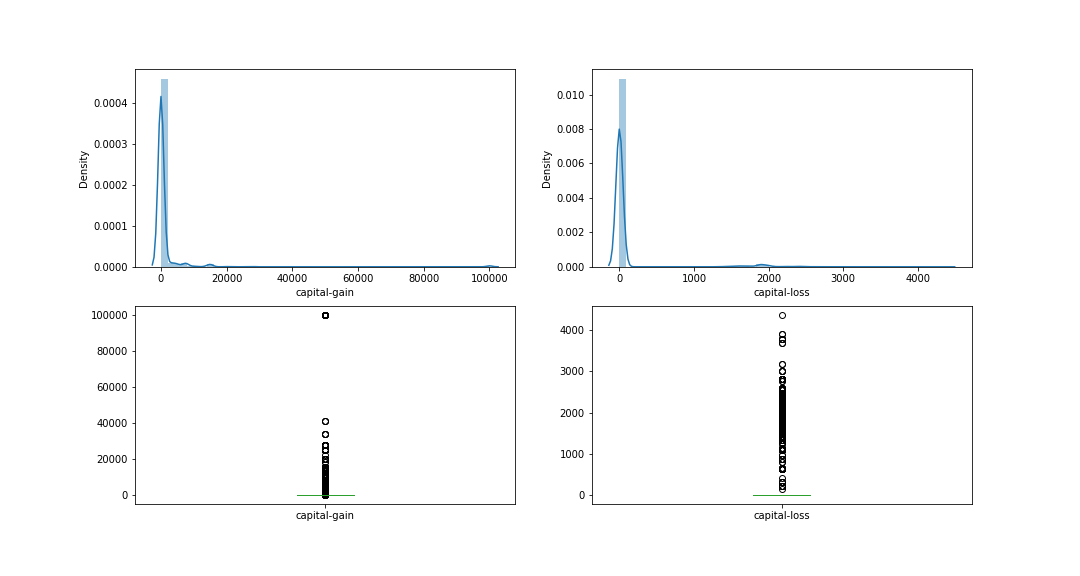

In [8]:
# 接下来，我们可以如2.1所问，画出这些偏的连续型随机变量的直方图和箱线图
# VS Code 可以用widget作为后端，画出的图会更好看、可以交互。
%matplotlib widget
# pd的列本身就是一个Series，可以直接调用plot方法
# data['capital-gain'].hist()
# data['capital-loss'].hist()
# 但是sns画的图更好看。
def draw(a, b, data=data):
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(data[a])
    plt.subplot(2, 2, 2)
    sns.distplot(data[b])
    plt.subplot(2, 2, 3)
    data[a].plot.box()
    plt.subplot(2, 2, 4)
    data[b].plot.box()
# 现在画出capital-gain和capital-loss的直方图和箱线图。 如图，为所求作。
draw('capital-gain', 'capital-loss')

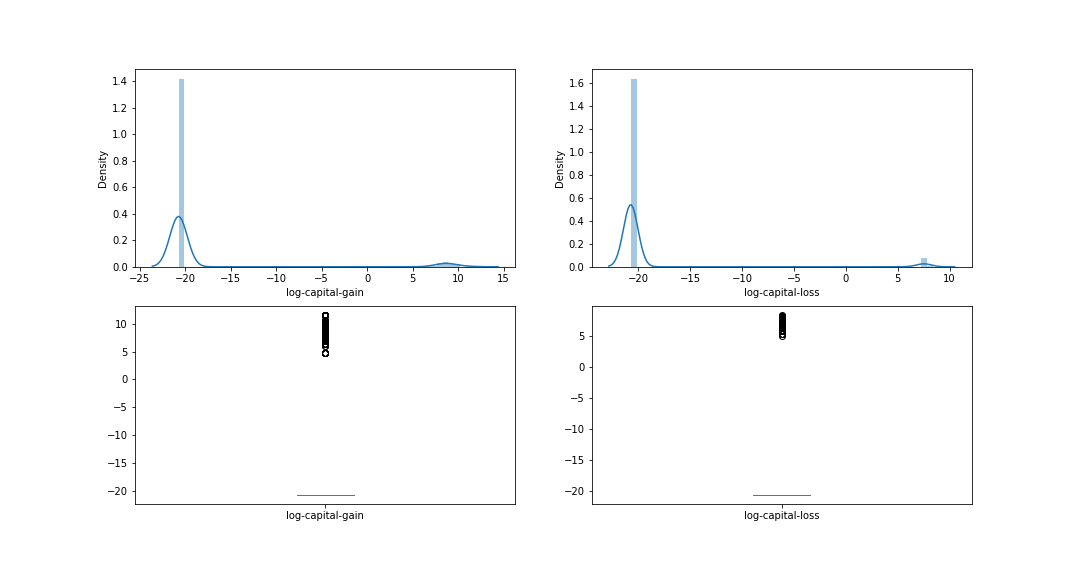

In [9]:
# 1.2 Outliers Treatment
# 使用课上说的log方法，把capital-gain和capital-loss的数据转换一下，使其更加符合正态分布
data['log-capital-gain'] = np.log(data['capital-gain']+1e-9)
data['log-capital-loss'] = np.log(data['capital-loss']+1e-9)
draw('log-capital-gain', 'log-capital-loss')

In [74]:
# 用describe可以看到log之后方差确实更小了。
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,log-capital-gain,log-capital-loss
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017,-18.245735,-19.387136
std,13.217870,2.552881,7506.430084,404.956092,12.007508,8.196855,5.995308
min,17.000000,1.000000,0.000000,0.000000,1.000000,-20.723266,-20.723266
25%,28.000000,9.000000,0.000000,0.000000,40.000000,-20.723266,-20.723266
50%,37.000000,10.000000,0.000000,0.000000,40.000000,-20.723266,-20.723266
75%,47.000000,13.000000,0.000000,0.000000,45.000000,-20.723266,-20.723266
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,11.512915,8.379309


In [75]:
print(data['capital-gain'].skew(), data['log-capital-gain'].skew()) # 偏度降低。右偏
print(data['capital-gain'].kurt(), data['log-capital-gain'].kurt()) # 峰度更加接近3。 细峰
print(data['capital-loss'].skew(), data['log-capital-loss'].skew()) # 偏度降低，但是不明显。右偏
print(data['capital-loss'].kurt(), data['log-capital-loss'].kurt()) # 峰度更加接近3，但是不明显。 细峰

11.789002180291192 3.010938909081399
150.15129227909196 7.083227344333681
4.516304152981587 4.264648806853588
19.36396949822179 16.18955753894983


In [76]:
# 可以看到，对于capital-loss而言，处理效果不明显，所以我们再对capital-loss做一次处理。
# 这一次我们使用 剪裁方法 而不是转换方法来处理异常值
from scipy import stats
data2 = data.copy()
# 我们计算Z分数。
data2['ZR'] = stats.zscore(data2['capital-loss'])
data2[['capital-loss', 'ZR']].head()
# 这些是不合格的数据，我们把它们剪裁掉。
data2[(data2['ZR']<-3) | (data2['ZR']>3)].shape 

(2077, 17)

In [77]:
# reset_index()
data2 = data2[(data2['ZR']>-3) & (data2['ZR']<3)].reset_index()
data.shape, data2.shape

((45222, 16), (43145, 18))

4.264648806853588 26.128118546391896
16.18955753894983 680.9663345518798
index               13048.949532
age                    13.238399
education-num           2.540256
capital-gain         7681.006537
capital-loss           31.682295
hours-per-week         12.000237
log-capital-gain        8.373365
log-capital-loss        1.040492
ZR                      0.078237
dtype: float64 age                   13.217870
education-num          2.552881
capital-gain        7506.430084
capital-loss         404.956092
hours-per-week        12.007508
log-capital-gain       8.196855
log-capital-loss       5.995308
dtype: float64


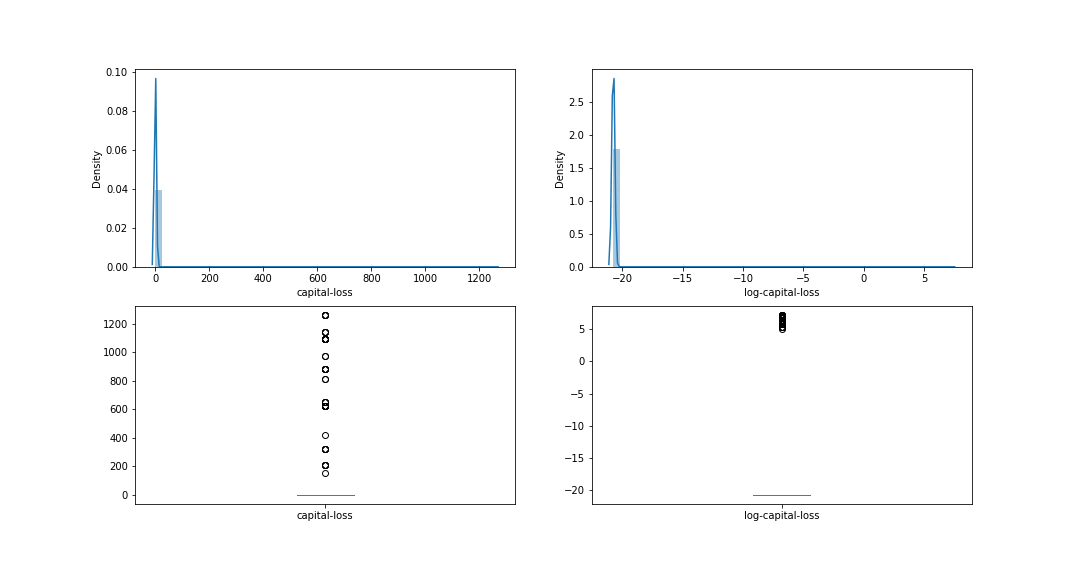

In [78]:
print(data['log-capital-loss'].skew(), data2['log-capital-loss'].skew()) 
print(data['log-capital-loss'].kurt(), data2['log-capital-loss'].kurt())
print(data2.std(), data.std())
# 可以看到，处理之后，数据的方差更小了，偏度和峰度却更加奇怪了。
# 是否应该采纳data2呢？我们可以看看data2的直方图和箱线图。
draw('capital-loss', 'log-capital-loss', data=data2)
# 从直方图看来，data2从大峰小峰变成了只有大峰。
# 从箱线图看来，data2还是有很多异常值的。怎么处理都没有效果。
# 毕竟，贫富差距是客观存在的。追求共同富裕，实现全面小康，是我们的目标，但是数据的分布就是如此，不能强求完美。
# 所以，我们还是采纳data吧。

In [79]:
#  2.3 Data Transformation
# 首先对连续性随机变量进行标准化处理
data = data.drop(['capital-gain', 'capital-loss'], axis=1) # 只保留log变换后的数据
连续型随机变量 = [col for col in data.columns if data[col].dtype!='object' and data[col].nunique()>10] # 加入log
from sklearn.preprocessing import StandardScaler
data[连续型随机变量] = StandardScaler().fit_transform(data[连续型随机变量])
data.describe() # 可以看到，数据已经标准化了。注意物理意义发生变化。标准化之后，对于有监督学习器的效果可以提高。

,age,education-num,hours-per-week,log-capital-gain,log-capital-loss
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.325424e-17,1.655293e-16,2.144732e-16,5.550379e-16,1.927902e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.630231e+00,-3.571870e+00,-3.326124e+00,-3.022572e-01,-2.228651e-01
25%,-7.980149e-01,-4.381216e-01,-7.812006e-02,-3.022572e-01,-2.228651e-01
50%,-1.171110e-01,-4.640300e-02,-7.812006e-02,-3.022572e-01,-2.228651e-01
75%,6.394489e-01,1.128753e+00,3.382907e-01,-3.022572e-01,-2.228651e-01
max,3.892656e+00,2.303909e+00,4.835527e+00,3.630536e+00,4.631414e+00


In [81]:
# Perform one-hot encoding on the data
# 接下来对离散型随机变量进行one-hot编码
离散型随机变量 = [col for col in data.columns if data[col].dtype=='object' or data[col].nunique()<=10]
data= pd.get_dummies(data, columns=离散型随机变量,drop_first=True)
# data.describe(include=['O']) #只看离散型随机变量。但是one hot编码之后，没有离散型随机变量了。
data.describe() # 现在大家都是数值型随机变量了。

,age,education-num,hours-per-week,log-capital-gain,log-capital-loss,workclass_ Local-gov_1,workclass_ Private_1,workclass_ Self-emp-inc_1,workclass_ Self-emp-not-inc_1,workclass_ State-gov_1,...,native-country_ Puerto-Rico_1,native-country_ Scotland_1,native-country_ South_1,native-country_ Taiwan_1,native-country_ Thailand_1,native-country_ Trinadad&Tobago_1,native-country_ United-States_1,native-country_ Vietnam_1,native-country_ Yugoslavia_1,income_>50K_1
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,-2.325424e-17,1.655293e-16,2.144732e-16,5.550379e-16,1.927902e-16,0.068551,0.736522,0.036398,0.083941,0.043032,...,0.003870,0.000442,0.002233,0.001216,0.000641,0.000575,0.913095,0.001835,0.000509,0.247844
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.252691,0.440524,0.187281,0.277303,0.202932,...,0.062088,0.021026,0.047207,0.034854,0.025316,0.023971,0.281698,0.042803,0.022547,0.431766
min,-1.630231e+00,-3.571870e+00,-3.326124e+00,-3.022572e-01,-2.228651e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.980149e-01,-4.381216e-01,-7.812006e-02,-3.022572e-01,-2.228651e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.171110e-01,-4.640300e-02,-7.812006e-02,-3.022572e-01,-2.228651e-01,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.394489e-01,1.128753e+00,3.382907e-01,-3.022572e-01,-2.228651e-01,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.892656e+00,2.303909e+00,4.835527e+00,3.630536e+00,4.631414e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exercise 3 Shuffle and Split Data

In [83]:
# Split the 'feature' and 'income' data into training and testing sets
# 接下来，我们把数据分成训练集和测试集。
from sklearn.model_selection import train_test_split
Y = data['income_>50K_1'] # Y 只有输出。
X = data.drop('income_>50K_1', axis=1) # X 只有输入。
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state=999) # 80%训练，20%测试
[i.shape for i in (X_train, X_test, y_train, y_test)]

[(36177, 95), (9045, 95), (36177,), (9045,)]

### Exercise 4 A Simple Model
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

since $ACC = \frac{TP+TN}{TP+FP+TN+FN}$, and when the model always predicted and individual made more than $50,000, then TN=FN=0, 
$ACC = Precision = TP/(TP + FP)$，according to the result in Exercise 1, the accuracy is 0.2478, which is lower than the normal model like Logistic Regression Model.

As for the F-score, since the FN = 0 when the model always predicted and individual made more than $50,000, so the F-score is 1, which is higher then the normal model like the Logistic Regression Model.

In [85]:
#What would the accuracy and F-score be on this dataset 
# if we chose a model that always predicted an individual made more than $50,000
acc = 高收入人数占比
TP = 高收入人数
FP = 低收入人数
FN = 0
TN = 0
precision = TP/(TP+FP) # 与acc一样
recall = TP/(TP+FN) # 为1
beta = 1
f_score = (1+beta**2)*precision*recall/(beta**2*precision+recall) # 
acc, f_score # 并不是1吧。

(0.2478439697492371, 0.39723551302498666)

### Exercise 5 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression


You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [112]:
# Evaluating Model
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, classification_report, roc_auc_score, roc_curve
# 有三个模型要比较，所以我们写一个函数来总结比较的过程。
def evaluate(model_generator, algs_name=None):
    if algs_name is None:
        algs_name = model_generator.__name__
    model = model_generator()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    print(f'{algs_name} accuracy = {accuracy_score(y_pred,y_test)}')
    try:
        y_prob = model.predict_proba(X_test)[:,1]
    except:
        y_prob = model.decision_function(X_test)
    fper, tper, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    print(f'{algs_name} f_score = {fbeta_score(y_pred,y_test, beta=1)}')
    plt.figure()
    plt.plot(fper, tper, color='orange', label='ROC')
    print(f'fper={fper}, tper={tper}, thresholds={thresholds}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {algs_name}')
    plt.legend()
    plt.show()

RandomForestClassifier accuracy = 0.8443338861249309
RandomForestClassifier f_score = 0.669638667292351
fper=[0.         0.08271787 1.        ], tper=[0.         0.62725275 1.        ], thresholds=[2 1 0]


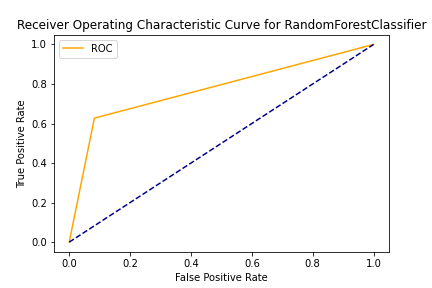

KNeighborsClassifier accuracy = 0.826865671641791
KNeighborsClassifier f_score = 0.6479316546762589
fper=[0.         0.10812408 1.        ], tper=[0.         0.63340659 1.        ], thresholds=[2 1 0]


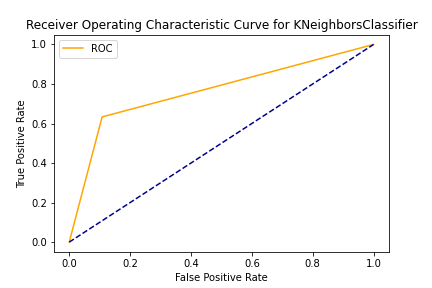

GaussianNB accuracy = 0.6283029297954671
GaussianNB f_score = 0.5528065974993349
fper=[0.         0.46750369 1.        ], tper=[0.         0.91340659 1.        ], thresholds=[2 1 0]


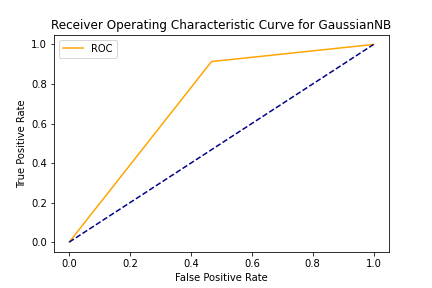

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
models = [GaussianNB, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, LinearSVC, LogisticRegression]
# 为了防止这些模型说我偏心，我随机选三个。
import random
three_models = random.sample(models, 3)
for model_gen in three_models:
    evaluate(model_gen)

### Exercise 6 Questions
#### (1) An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List two supervised learning models that apply to this problem, and you will test them on census data and plot the following graph.

In [114]:
# 随机森林有特征重要性的属性，我们可以看看哪些特征重要。
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
importances

array([2.38283105e-01, 6.95268835e-02, 1.16717392e-01, 1.07308029e-01,
       3.55764286e-02, 7.04134383e-03, 1.29943902e-02, 6.62220880e-03,
       9.96505260e-03, 5.68462510e-03, 1.58241618e-04, 2.07176583e-03,
       8.35663061e-04, 3.11928283e-04, 6.97323202e-04, 2.02062889e-03,
       1.46380574e-03, 2.62569866e-03, 2.90738413e-03, 1.23046717e-02,
       3.03267771e-03, 7.89818016e-03, 8.41545034e-03, 5.31294306e-05,
       5.46133040e-03, 5.29621971e-03, 3.89171913e-04, 9.27699178e-02,
       1.21256995e-03, 3.56061742e-02, 2.80666512e-03, 2.48614180e-03,
       3.04124835e-05, 7.94270571e-03, 1.96717594e-02, 5.04307740e-03,
       3.72194071e-03, 4.95417732e-03, 9.25913657e-03, 2.11491044e-04,
       1.60977770e-02, 3.74456792e-03, 8.24626470e-03, 5.17750660e-03,
       5.22777227e-03, 2.09101980e-02, 2.63468780e-03, 1.17989934e-02,
       9.95413284e-03, 7.49529090e-03, 3.08337309e-03, 5.00172427e-03,
       9.93425653e-04, 6.84752398e-03, 1.75191687e-02, 1.24256877e-03,
      

In [115]:
# 参考https://ljalphabeta.gitbooks.io/python-/content/random_forest_feature_importance.html
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], importances[indices[f]]))

 1) age                            0.238283
 2) hours-per-week                 0.116717
 3) log-capital-gain               0.107308
 4) marital-status_ Married-civ-spouse_1 0.092770
 5) education-num                  0.069527
 6) marital-status_ Never-married_1 0.035606
 7) log-capital-loss               0.035576
 8) relationship_ Not-in-family_1  0.020910
 9) occupation_ Exec-managerial_1  0.019672
10) sex_ Male_1                    0.017519
11) occupation_ Prof-specialty_1   0.016098
12) workclass_ Private_1           0.012994
13) education_level_ Bachelors_1   0.012305
14) relationship_ Own-child_1      0.011799
15) workclass_ Self-emp-not-inc_1  0.009965
16) relationship_ Unmarried_1      0.009954
17) occupation_ Other-service_1    0.009259
18) education_level_ Masters_1     0.008415
19) occupation_ Sales_1            0.008246
20) occupation_ Craft-repair_1     0.007943
21) education_level_ HS-grad_1     0.007898
22) relationship_ Wife_1           0.007495
23) workclass_ Local-gov_

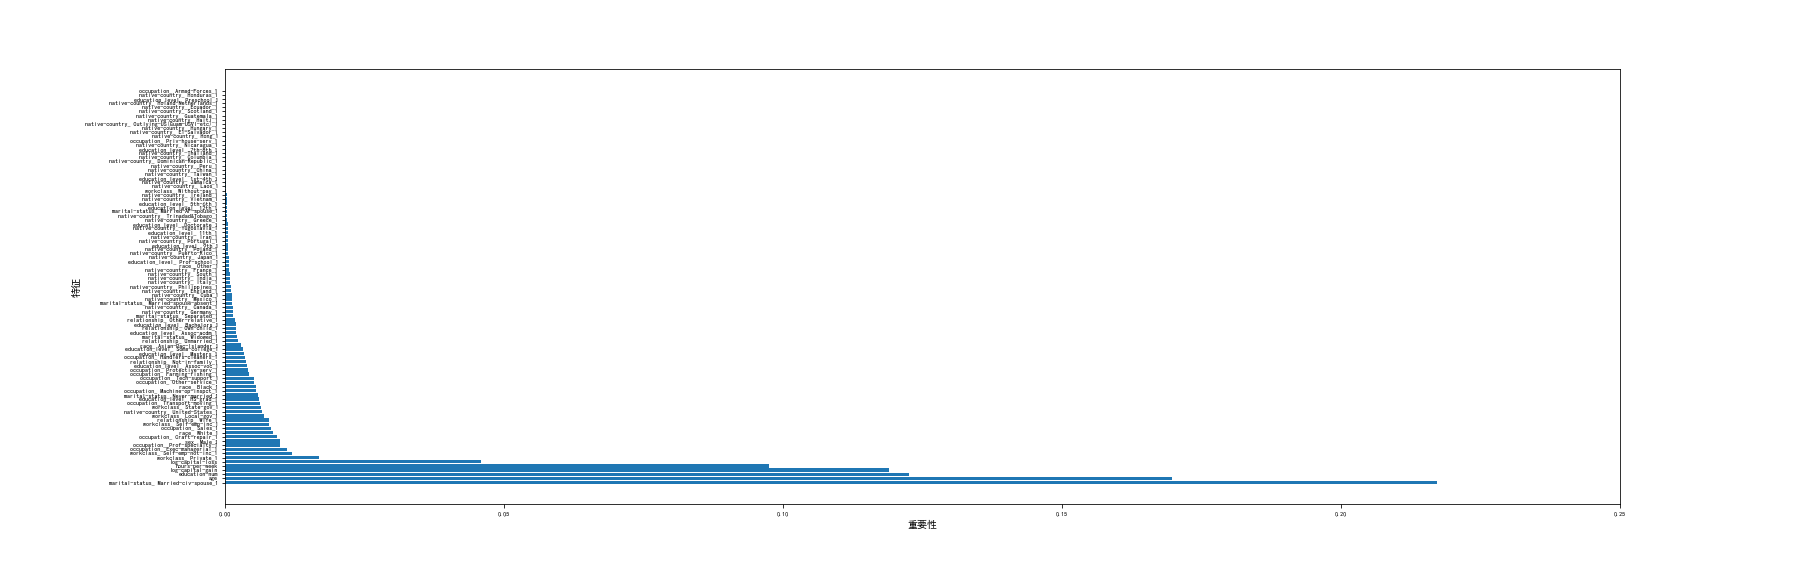

In [131]:
plt.rcParams['font.sans-serif']=['SimHei'] #中文
plt.rcParams['axes.unicode_minus']=False #负号
def draw():
    plt.figure(figsize=(25,8))
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.barh(np.arange(importances.size), importances[indices], height=0.8) # 打横的条形图
    plt.xticks(np.arange(0,0.3,0.05))
    plt.yticks(np.arange(indices.size),data.columns[indices])
    plt.xlabel("重要性")
    plt.ylabel("特征")
    plt.show()
draw()

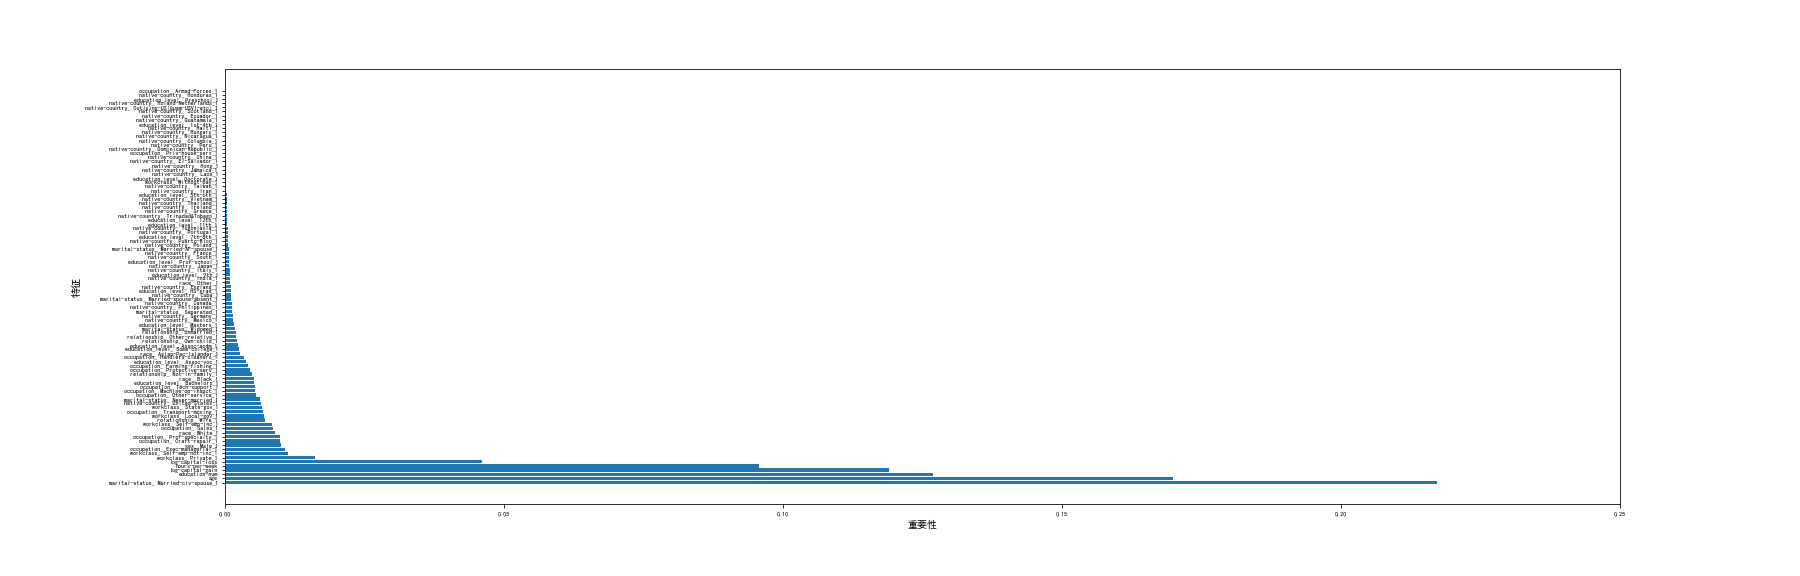

In [132]:
model = DecisionTreeClassifier() # 换个模型看看。
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
draw() # 和随机森林的结果不一样，但是大致相同。

#### (2) Describe one real-world application in industry where a model can be applied

#### (3) What are the strengths of the model; when does it perform well?

#### (4) What are the weaknesses of the model; when does it perform poorly?

#### (5) What makes this model a good candidate for the problem, given what you know about the data?

(2) 工业上，可以对产品进行缺陷检测。

(3) 模型的优势在于自动总结了数据中的统计规律。如果新的数据分布和训练集相似，而且模型的归纳偏好和新的数据分布比较像，那么就可以表现得很好。

(4) 没有大量数据，模型总结的规律不准确，泛化性能不好。如果真实世界的基准真相已经发生了变化，模型搞不准。

(5) 如果模型的ROC曲线比较好看，那么就是比较好的候选模型。如果知道数据是正态分布的，那么基于正态分布的模型就比较强，比如GassianNB。 
